In [1]:
import torch
import torchvision
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
train = torchvision.datasets.MNIST(root='./train', train=True, download=True)
test = torchvision.datasets.MNIST(root='./test', train=False, download=True)

In [3]:
x_train = train.data
x_test = test.data
y_train = train.targets
y_test = test.targets

In [9]:
x_train = torch.reshape(x_train, (x_train.shape[0], -1)).float() / 255
x_test = torch.reshape(x_test, (x_test.shape[0], -1)).float() / 255
x_train.shape,x_test.shape

torch.Tensor

In [5]:
class Layer(torch.nn.Module):
    def __init__(self, size_in, size_out, activation_func):
        super().__init__()
        self.w = torch.nn.Parameter(torch.randn(size_in,size_out, requires_grad = True))
        self.b = torch.nn.Parameter(torch.randn(1,size_out, requires_grad = True))
        self.activation_func = activation_func

    def forward(self, z_in):
        return self.activation_func(z_in @ self.w + self.b)

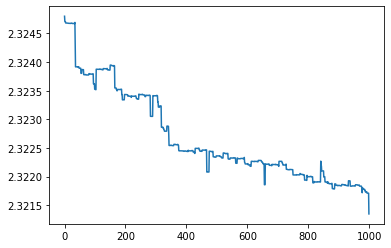

In [10]:
model = Layer(784, 10, torch.nn.Softmax(dim=1))
Loss = torch.nn.CrossEntropyLoss()
iterations = 1000
optim = torch.optim.Adam(model.parameters(), 1e-4)
losses = []
for i in range(iterations):
    y_hat = model(x_train)
    J = Loss(y_hat, y_train)
    J.backward()
    optim.step()
    optim.zero_grad()
    losses.append(J.detach())
plt.plot(losses)

In [28]:
y_hat = model(x_train)
torch.min(y_train)
#torch.sum(torch.eq(y_train,torch.argmax(y_hat,dim=1))) / 60000

tensor(0)

In [ ]:
class NN(torch.nn.Module):
    def __init__(self, size_in, size_out, activation_func):
        super().__init__()
        self.layers = nn.ModuleList()
        
        self.layers.append(Layer(size_in, ))